In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gold-price-forecasting-dataset/gold_price_forecasting_dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/gold-price-forecasting-dataset/gold_price_forecasting_dataset.csv')

In [3]:
df.head(5)

,date,adj close,close,high,low,open,volume,ma_7,ma_30,ma_90,daily_return,volatility_7,volatility_30,rsi,macd,macd_signal,bb_upper,bb_lower
0,2021-06-11,1877.400024,1877.400024,1902.300049,1875.199951,1900.900024,349,1887.828561,1860.180005,1790.618891,-0.008869,0.009353,0.007538,54.722931,19.724030,24.933953,1918.242879,1853.797124
1,2021-06-14,1864.000000,1864.000000,1866.599976,1846.500000,1866.199951,41,1886.799997,1863.403337,1790.972225,-0.007138,0.006411,0.007711,49.391919,16.433420,23.233846,1913.119794,1861.530206
2,2021-06-15,1854.500000,1854.500000,1867.199951,1854.400024,1866.400024,78,1881.757132,1865.506669,1791.701114,-0.005097,0.004572,0.007474,45.972581,12.910196,21.169116,1914.969370,1858.380630
3,2021-06-16,1859.500000,1859.500000,1860.099976,1809.199951,1859.400024,117,1876.428554,1868.296667,1792.241113,0.002696,0.004348,0.007240,48.012515,10.401571,19.015607,1915.862799,1856.657196
4,2021-06-17,1773.800049,1773.800049,1823.300049,1769.599976,1811.800049,1135,1859.514282,1867.953337,1791.595558,-0.046088,0.016895,0.011288,28.293542,1.481124,15.508710,1938.202457,1823.567538


In [4]:
df.tail(5)

,date,adj close,close,high,low,open,volume,ma_7,ma_30,ma_90,daily_return,volatility_7,volatility_30,rsi,macd,macd_signal,bb_upper,bb_lower
1162,2026-01-26,5079.700195,5079.700195,5095.600098,5052.200195,5081.500000,180,4822.971401,4513.550000,4189.464434,0.020799,0.014470,0.014899,82.883455,169.000739,122.250355,5019.523790,4155.806191
1163,2026-01-27,5079.899902,5079.899902,5079.899902,5079.899902,5079.899902,34,4889.199986,4540.029997,4204.998877,0.000039,0.014091,0.014677,82.887953,182.167754,134.233835,5096.080527,4134.329434
1164,2026-01-28,5301.600098,5301.600098,5301.600098,5301.600098,5301.600098,112054,4991.085728,4573.413330,4223.419990,0.043643,0.014892,0.016210,86.978544,208.093290,149.005726,5210.931481,4117.128480
1165,2026-01-29,5318.399902,5318.399902,5586.200195,5097.500000,5415.700195,23709,5070.914272,4607.136654,4241.718877,0.003169,0.014215,0.016193,87.227702,227.374043,164.679389,5310.168254,4112.721688
1166,2026-01-30,4713.899902,4713.899902,5440.500000,4700.000000,5376.399902,23709,5054.071429,4620.783317,4252.532210,-0.113662,0.051106,0.027369,50.088570,191.666666,170.076845,5302.863243,4158.856679


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1167 non-null   object 
 1   adj close      1167 non-null   float64
 2   close          1167 non-null   float64
 3   high           1167 non-null   float64
 4   low            1167 non-null   float64
 5   open           1167 non-null   float64
 6   volume         1167 non-null   int64  
 7   ma_7           1167 non-null   float64
 8   ma_30          1167 non-null   float64
 9   ma_90          1167 non-null   float64
 10  daily_return   1167 non-null   float64
 11  volatility_7   1167 non-null   float64
 12  volatility_30  1167 non-null   float64
 13  rsi            1167 non-null   float64
 14  macd           1167 non-null   float64
 15  macd_signal    1167 non-null   float64
 16  bb_upper       1167 non-null   float64
 17  bb_lower       1167 non-null   float64
dtypes: float

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

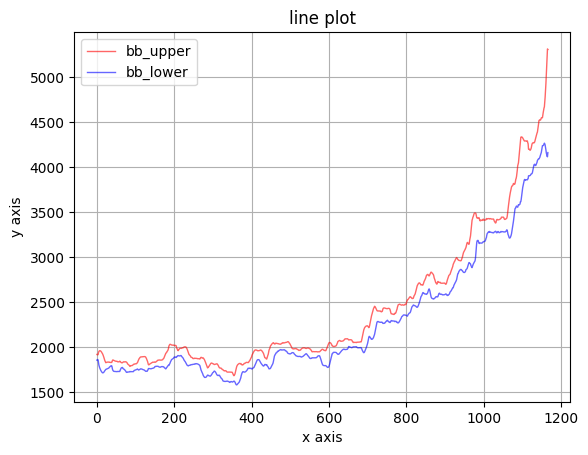

In [9]:
df.bb_upper.plot(kind='line',color='r',label='bb_upper',linewidth=1,alpha=0.6,grid=True,linestyle='-')
df.bb_lower.plot(kind='line',color='b',label='bb_lower',linewidth=1,alpha=0.6,grid=True,linestyle='-')
plt.legend(loc='best')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('line plot')
plt.show()

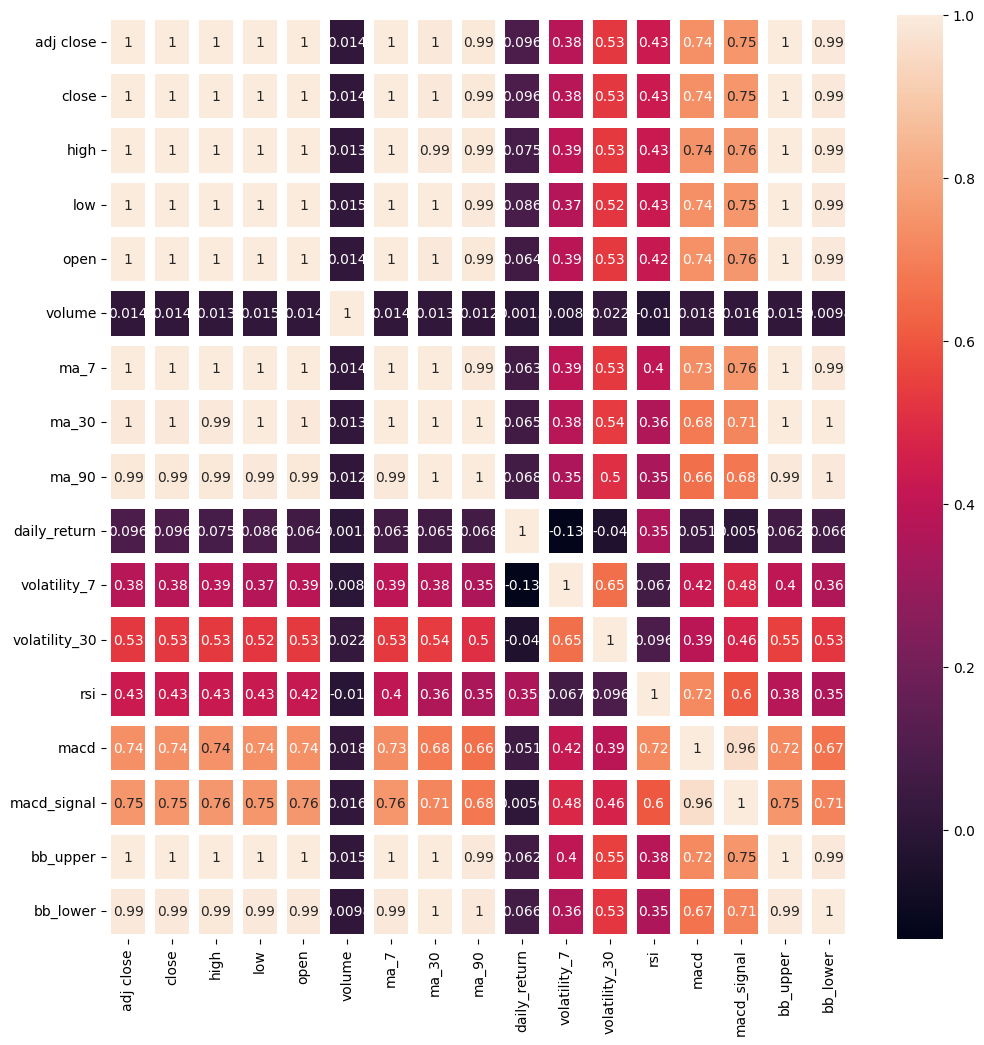

In [11]:
f , ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(numeric_only=True) , annot = True , linewidths = 6 , ax = ax)
plt.show()

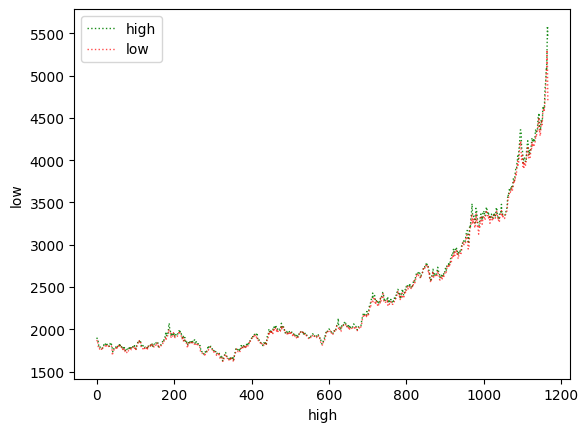

In [14]:
df.high.plot(kind='line',color='green',label='high',linewidth=1,alpha=0.9,linestyle=':')
df.low.plot(kind='line',color='red',label='low',linewidth=1,alpha=0.7,linestyle=':')
plt.legend(loc='best')
plt.xlabel('high')
plt.ylabel('low')
plt.show()


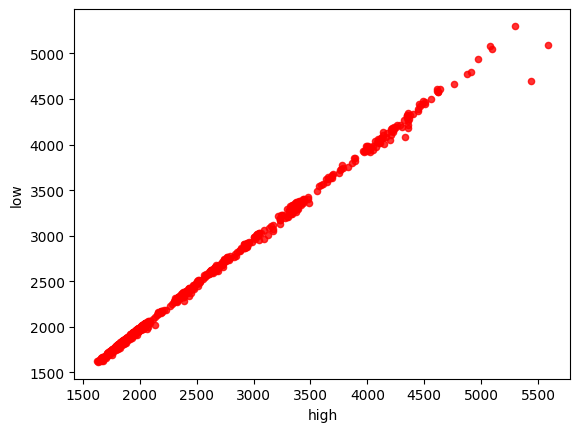

In [16]:
df.plot(kind='scatter',x='high',y='low',alpha=0.8,color='red')
plt.xlabel('high')
plt.ylabel('low')
plt.show()